# **PCA**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data1=pd.read_csv('wine.csv')
data1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### EDA

In [3]:
data1.shape

(178, 14)

In [4]:
data1.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
# printing all the values and counts for each variable

for column in data1.columns:
  print(f"Values and counts for column '{column}':")
  print(data1[column].value_counts())
  print("\n")

Values and counts for column 'Type':
Type
2    71
1    59
3    48
Name: count, dtype: int64


Values and counts for column 'Alcohol':
Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64


Values and counts for column 'Malic':
Malic
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64


Values and counts for column 'Ash':
Ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64


Values and counts for column 'Alcalinity':
Alcalinity
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 63, dtype: int64


Values and counts for column 'Magnesium':
Magnesium
88     13
86     11
98      9
101     9
96  

In [7]:
# check for null values
data1.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
# check for duplicates

duplicates = data1.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows:")
data1[duplicates]

Number of duplicate rows: 0


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


### Data Visualization

In [9]:
data=data1.drop(['Type'],axis=1)
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


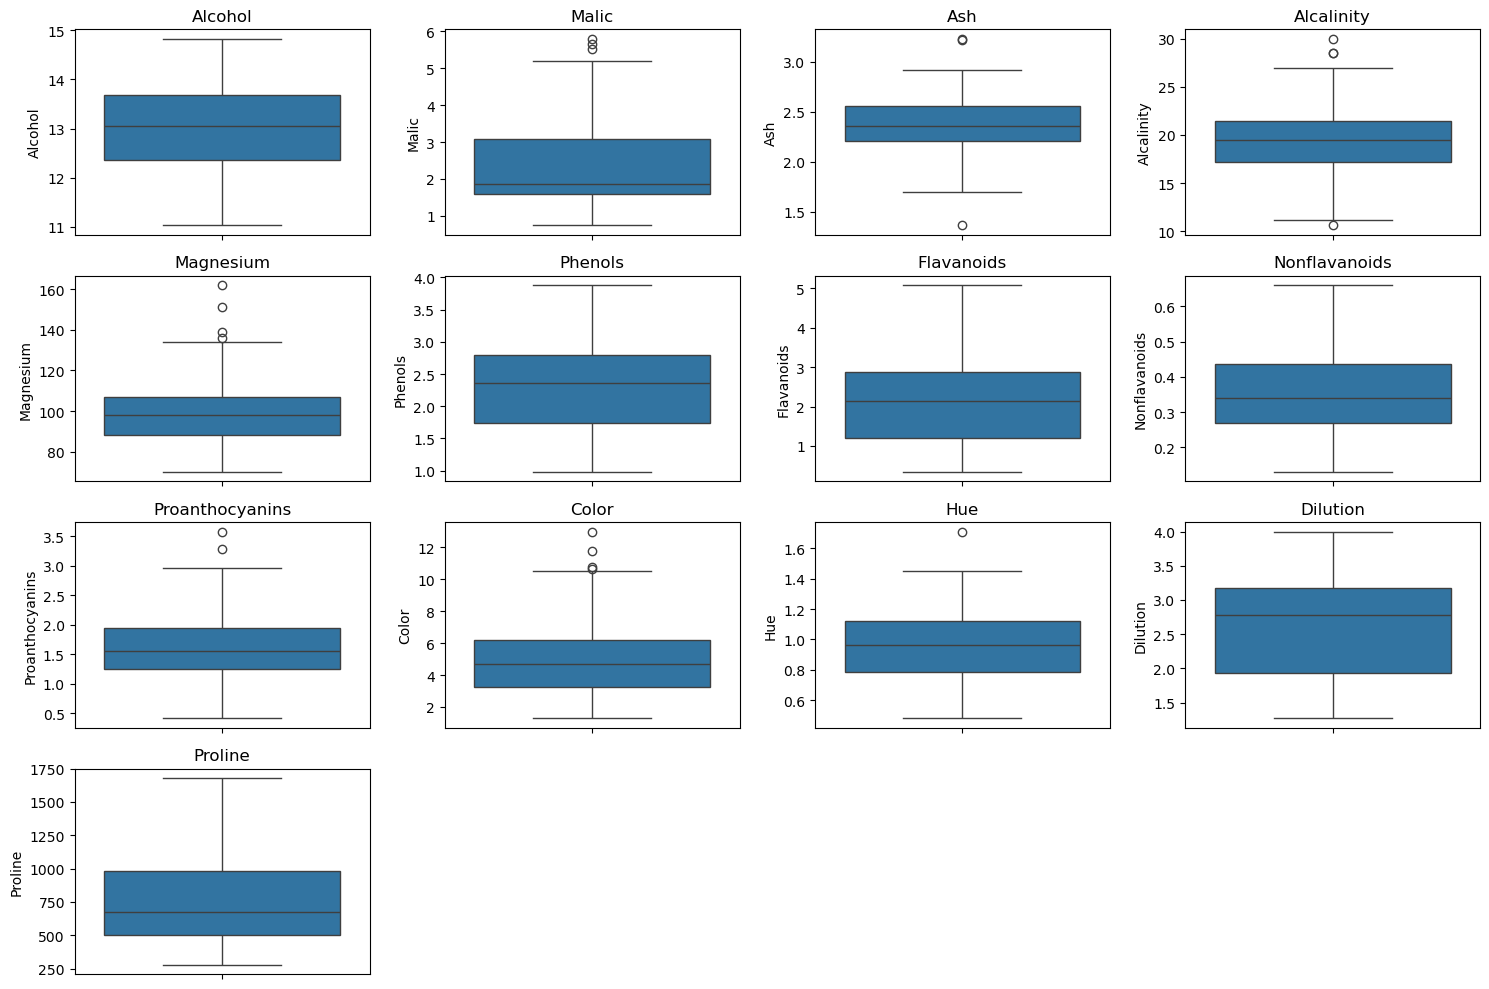

In [10]:
# boxplots of all variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
# Outlier removal

for column in data.columns:
  # Calculate Q1 and Q3
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

  # Replace outliers with NaN
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = np.nan

  # Fill NaN values with the column's average
  data[column].fillna(data[column].mean(), inplace=True)


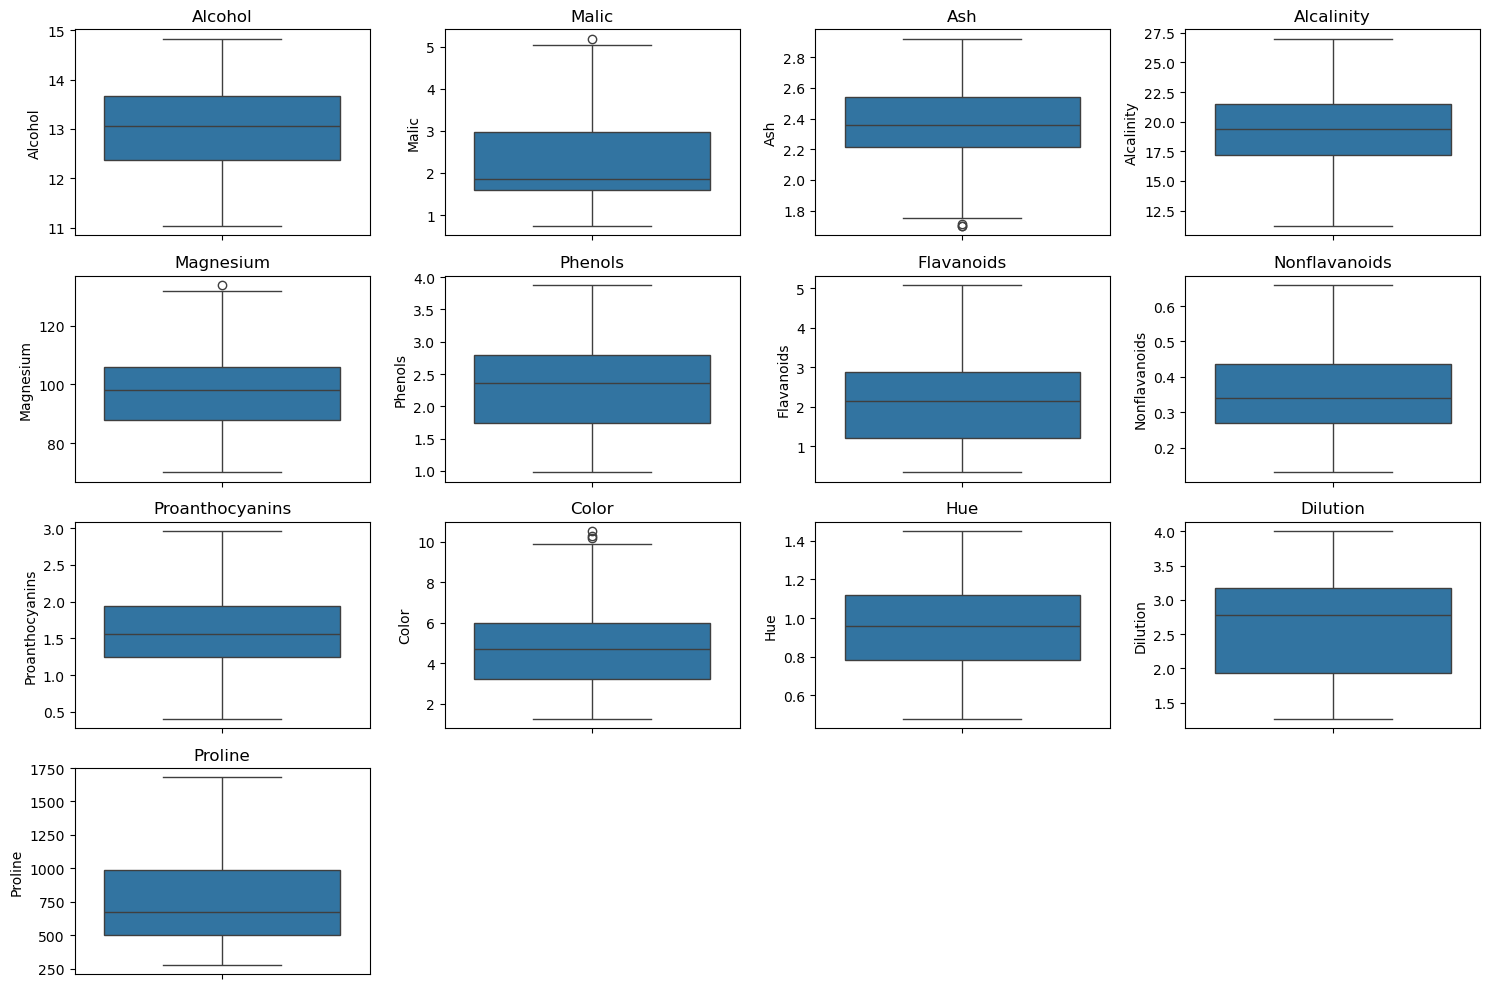

In [12]:
# Create boxplots for all variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
#check the data for zero variance values
(data == 0).all()

Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

In [14]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.279486,2.362457,19.382184,98.655172,2.295112,2.029270,0.361854,1.570000,4.908678,0.953198,2.611685,746.893258
std,0.811827,1.028640,0.247380,3.025461,12.245444,0.625851,0.998859,0.124453,0.537297,2.092443,0.221421,0.709990,314.907474
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.212500,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.382184,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.960000,2.780000,673.500000
75%,13.677500,2.982500,2.540000,21.500000,106.000000,2.800000,2.875000,0.437500,1.942500,6.000000,1.120000,3.170000,985.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,5.080000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000


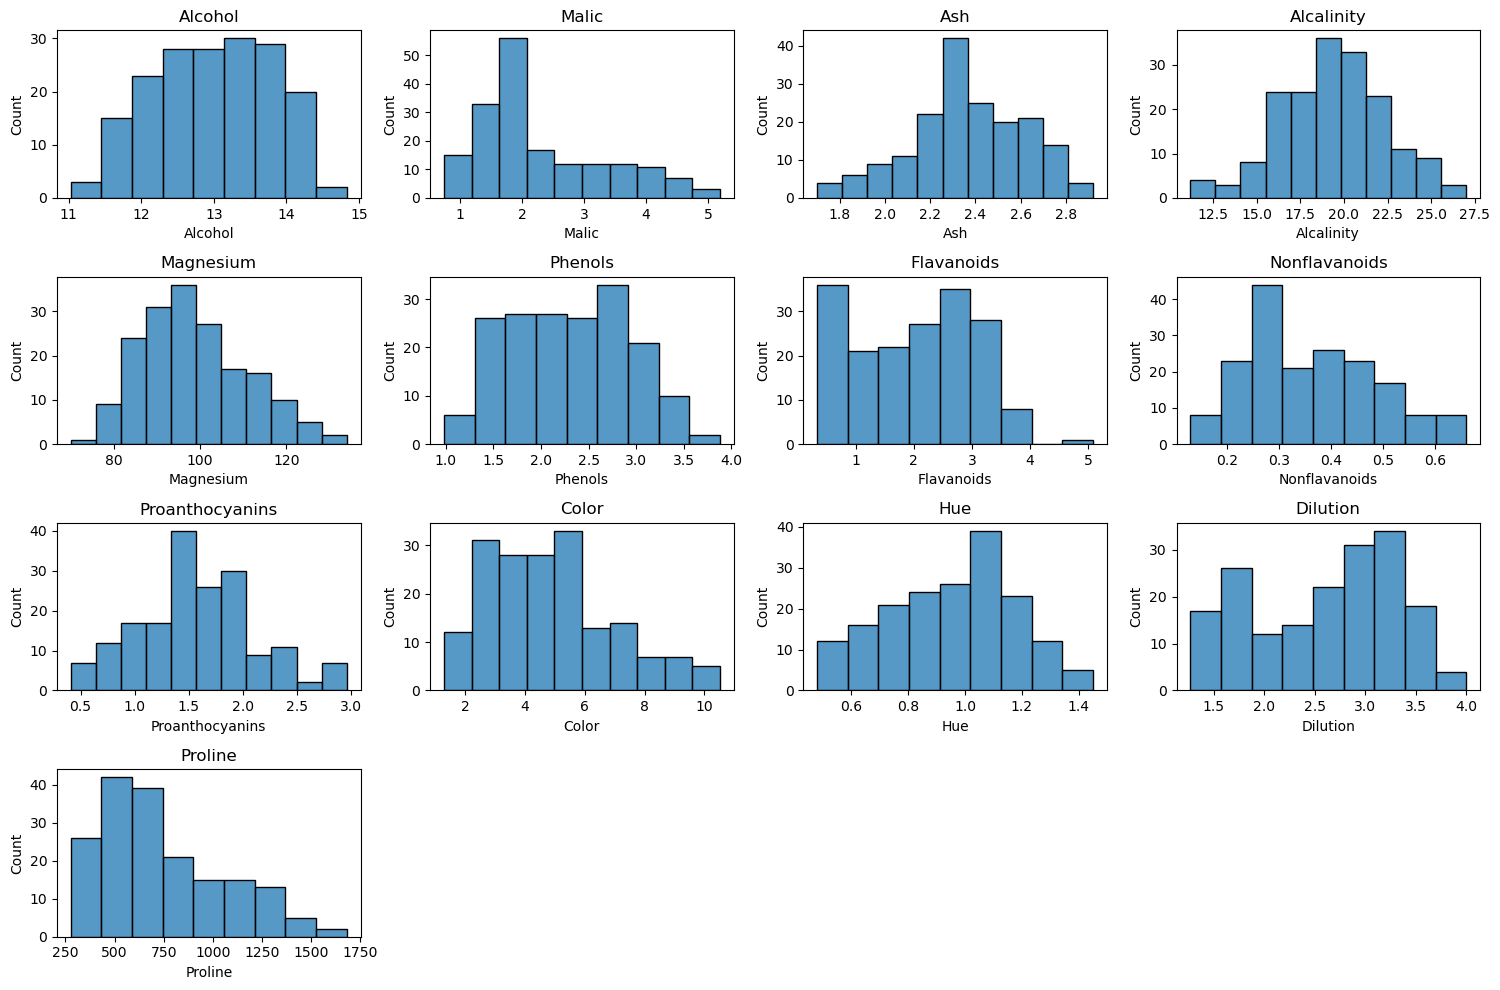

In [15]:
#  histograms of all the numerical variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

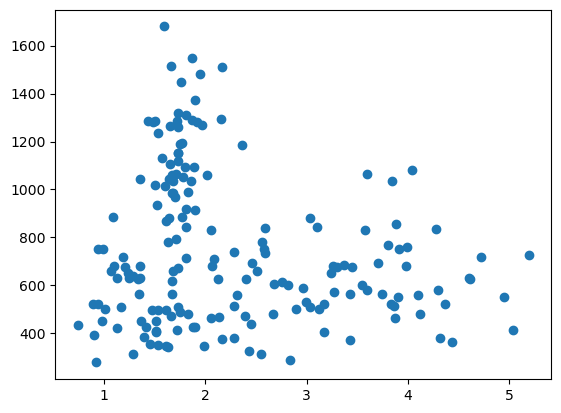

In [16]:
x_axis=data.loc[:,['Malic']]
y_axis=data.loc[:,['Proline']]
plt.scatter(x_axis,y_axis)

In [17]:
# correlaton matrix
data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.095453,0.250786,-0.299319,0.372944,0.289101,0.236815,-0.155929,0.197480,0.553884,-0.027190,0.072343,0.643720
Malic,0.095453,1.000000,0.169180,0.291269,0.044943,-0.341528,-0.406694,0.266042,-0.252697,0.295548,-0.557414,-0.367972,-0.172532
Ash,0.250786,0.169180,1.000000,0.333045,0.368622,0.093018,0.020901,0.157236,-0.002624,0.215947,-0.076035,-0.067511,0.244073
Alcalinity,-0.299319,0.291269,0.333045,1.000000,-0.152192,-0.414126,-0.484488,0.368263,-0.294141,-0.068183,-0.349249,-0.370339,-0.482719
Magnesium,0.372944,0.044943,0.368622,-0.152192,1.000000,0.238666,0.226477,-0.221695,0.096349,0.329738,-0.011299,0.044672,0.429113
Phenols,0.289101,-0.341528,0.093018,-0.414126,0.238666,1.000000,0.864564,-0.449935,0.616607,-0.052176,0.442599,0.699949,0.498115
Flavanoids,0.236815,-0.406694,0.020901,-0.484488,0.226477,0.864564,1.000000,-0.537900,0.679297,-0.130104,0.558309,0.787194,0.494193
Nonflavanoids,-0.155929,0.266042,0.157236,0.368263,-0.221695,-0.449935,-0.537900,1.000000,-0.362978,0.108118,-0.295659,-0.503270,-0.311385
Proanthocyanins,0.197480,-0.252697,-0.002624,-0.294141,0.096349,0.616607,0.679297,-0.362978,1.000000,-0.045212,0.312537,0.546572,0.353533
Color,0.553884,0.295548,0.215947,-0.068183,0.329738,-0.052176,-0.130104,0.108118,-0.045212,1.000000,-0.456625,-0.384746,0.379739


### Data Preprocessing

In [18]:
# standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(data)
SS_X  = pd.DataFrame(SS_X)
SS_X.columns= list(data)
SS_X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-5.551916e-01,0.273803,-1.253644,2.321254,0.808997,1.034819,-0.659563,1.343821,0.350492,0.393129,1.847920,1.013009
1,0.246290,-4.869486e-01,-0.901789,-2.712071,0.110132,0.568648,0.733629,-0.820719,-0.541261,-0.253373,0.438420,1.113449,0.965242
2,0.196879,7.849338e-02,1.246707,-0.259263,0.192026,0.808997,1.215533,-0.498407,2.314358,0.369662,0.347839,0.788587,1.395148
3,1.691550,-3.212156e-01,0.557567,-0.855892,1.174746,2.491446,1.466525,-0.981875,1.138515,1.385690,-0.422095,1.184071,2.334574
4,0.295700,3.027204e-01,2.057461,0.536242,1.584213,0.808997,0.663351,0.226796,0.466604,-0.282129,0.393129,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,-4.329426e-16,0.354878,0.370512,-0.299334,-0.985614,-1.424900,1.274310,-0.951873,1.337764,-1.418480,-1.231206,-0.021952
174,0.493343,1.589588e+00,0.476491,1.199163,0.273919,-0.793334,-1.284344,0.549108,-0.298627,1.146061,-1.146738,-1.485445,0.009893
175,0.332758,1.950301e+00,-0.415337,0.204782,1.748000,-1.129824,-1.344582,0.549108,-0.410612,2.535911,-1.644931,-1.485445,0.280575
176,0.209232,3.027204e-01,0.030577,0.204782,1.748000,-1.033684,-1.354622,1.354888,-0.205306,2.104578,-1.599641,-1.400699,0.296498


## PCA

In [19]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA()

pc = pca.fit_transform(SS_X)
pc = pd.DataFrame(pc)
pc


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.458373,-1.661661,0.079749,-0.099132,0.709658,-0.002985,0.783871,0.487536,0.768160,0.841105,-0.274245,-0.897263,-0.250182
1,2.369792,0.265341,-1.968928,-0.616171,0.484955,-1.057172,0.426188,-0.730430,-0.610954,0.535603,-0.101006,-0.230133,-0.022861
2,2.583415,-1.020854,1.096403,0.878247,-0.763750,0.423468,0.066019,0.820374,-1.026126,-0.076124,-0.219683,-0.145506,0.090222
3,3.877087,-2.805823,-0.042666,0.614339,-0.243102,0.361027,-0.107190,-0.917786,0.054709,0.036681,-0.576464,0.384136,-0.381692
4,0.973257,-1.118098,2.416005,-0.162077,0.422515,-0.213096,0.641271,0.072705,0.154148,0.251431,0.469274,-0.040090,-0.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-2.617730,-1.682380,-0.628826,-0.582027,-0.858947,0.479251,-0.320147,-0.375858,0.182609,0.488732,-0.097821,-0.187435,-0.158725
174,-2.651781,-1.988465,0.189049,0.606851,-0.036127,0.050168,-0.234186,0.496102,0.081376,-0.410249,-0.062740,0.324906,-0.189271
175,-2.621128,-3.235196,-1.154154,0.650655,0.852294,0.344746,0.991230,0.455106,0.142427,-0.824525,-0.353141,-0.375006,-0.261112
176,-2.322639,-2.699759,-0.635155,-0.436199,0.173484,1.239405,1.244046,0.237584,0.216168,-0.061394,-0.540584,-0.424419,-0.287949


In [20]:
pc.iloc[:,0:13].var()

0     4.856535
1     2.659872
2     1.245543
3     0.909367
4     0.787068
5     0.574986
6     0.511412
7     0.377835
8     0.323480
9     0.275341
10    0.249086
11    0.201673
12    0.101249
dtype: float64

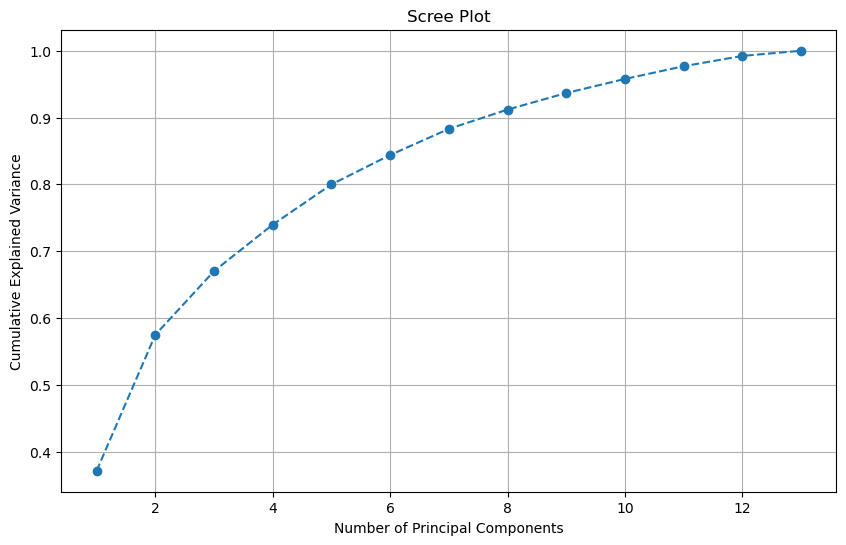

Number of principal components selected (50% variance): 2


In [21]:
# selecting principal components using scree plot

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


# selecting components explaining 50% variance
n_components = np.argmax(cumulative_variance >= 0.5) + 1
print(f"Number of principal components selected (50% variance): {n_components}")

Number of principal components selected: 2

### Clustering with Original Data:

In [22]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(data)

KMeans(n_clusters=3)

In [23]:
pred=Kmeans.predict(data)

In [24]:
pred

array([1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

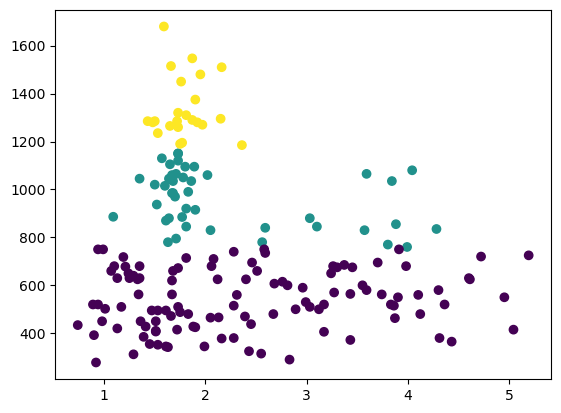

In [25]:
plt.scatter(x_axis,y_axis,c=pred)

In [26]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data,pred)
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.59


In [27]:
data["K_Cluster"] = pred
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,K_Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
scores= []
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    data["K_Cluster"] = cluster.fit_predict(data)
    scores.append(silhouette_score(data,data["K_Cluster"]))
scores

[0.6576511352627293,
 0.5726249390064647,
 0.5643031897783574,
 0.5514016439120458,
 0.5680997359433135,
 0.5659867340106662,
 0.545920044602748,
 0.5348707710386735,
 0.5270694067158876]

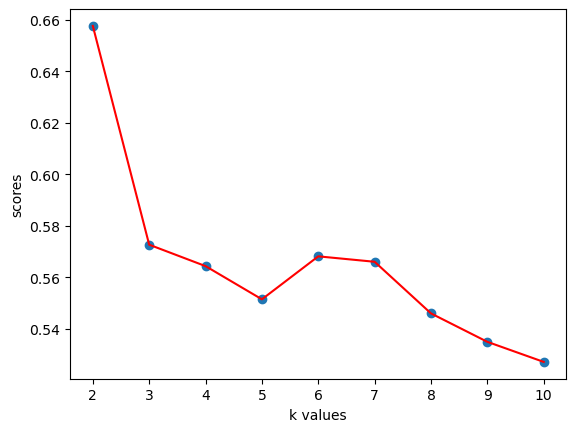

In [29]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel("k values")
plt.ylabel("scores")
plt.show()

### Clustering with PCA Data:

In [40]:
pc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.458373,-1.661661,0.079749,-0.099132,0.709658,-0.002985,0.783871,0.487536,0.768160,0.841105,-0.274245,-0.897263,-0.250182
1,2.369792,0.265341,-1.968928,-0.616171,0.484955,-1.057172,0.426188,-0.730430,-0.610954,0.535603,-0.101006,-0.230133,-0.022861
2,2.583415,-1.020854,1.096403,0.878247,-0.763750,0.423468,0.066019,0.820374,-1.026126,-0.076124,-0.219683,-0.145506,0.090222
3,3.877087,-2.805823,-0.042666,0.614339,-0.243102,0.361027,-0.107190,-0.917786,0.054709,0.036681,-0.576464,0.384136,-0.381692
4,0.973257,-1.118098,2.416005,-0.162077,0.422515,-0.213096,0.641271,0.072705,0.154148,0.251431,0.469274,-0.040090,-0.030533


In [73]:
X = pc.iloc[:,0:2]
X.head()

,0,1
0,3.458373,-1.661661
1,2.369792,0.265341
2,2.583415,-1.020854
3,3.877087,-2.805823
4,0.973257,-1.118098


In [74]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(X)

KMeans(n_clusters=3)

In [75]:
pred1=Kmeans.predict(X)

In [76]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

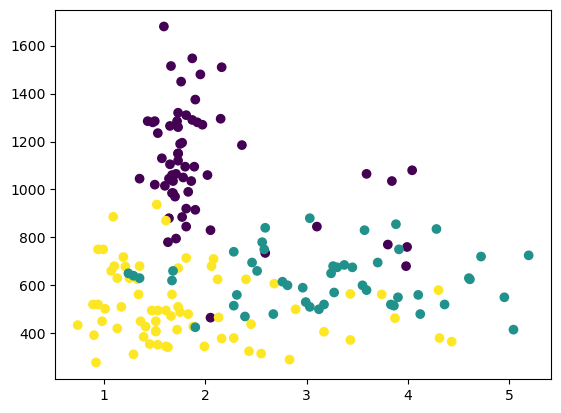

In [77]:
plt.scatter(x_axis,y_axis,c=pred1)

In [78]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,pred1)
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.56


In [79]:
data["K_Cluster_PCA"] = pred1
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,K_Cluster,K_Cluster_PCA
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,3,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,9,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,5,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,0


In [80]:
scores_pca= []
for i in range(2,11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i, n_init=20)
    data["K_Cluster_PCA"] = cluster.fit_predict(X)
    scores_pca.append(silhouette_score(X,data["K_Cluster_PCA"]))
scores_pca

[0.453207586114438,
 0.56287241290834,
 0.4911781352376325,
 0.45581736485057234,
 0.4032732199286609,
 0.4133500844289118,
 0.3911491333157048,
 0.38096817783568365,
 0.38325026186690536]

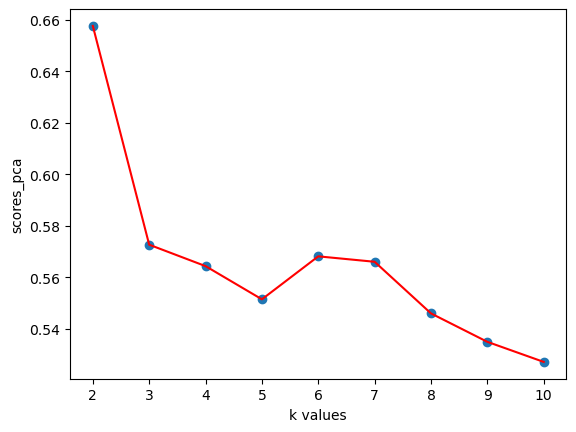

In [81]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel("k values")
plt.ylabel("scores_pca")
plt.show()

**Upon analysis almost closer Silhouette_scores are obtained when clustering with all variables and clustering with just 2 PCA components thus reducing complexity to a great extend.**

**Impacts of dimensionality reduction on clustering performance:**

Noise Reduction

Reduced Overfitting

Computational Efficiency

Improved Distance Metrics

Better Visualization

**Trade-offs between using PCA and clustering directly on the original dataset:**

1)Loss of Information:

PCA may discard dimensions with low variance, which could still hold critical information for clustering.

2)Transformation Bias:

Principal components are linear combinations of original features, which can distort the original feature relationships or make clusters less interpretable.

3)Local Structures:

PCA emphasizes global variance and may miss local patterns or structures crucial for certain clustering methods (e.g., DBSCAN).

4)Dependence on Variance:

PCA assumes that the most important information is in high-variance components, which may not always be true for clustering tasks.


**Practical Implications of Using PCA and Clustering:**

Dimensionality Reduction

Noise and Redundancy Reduction

Feature Transformation

Trade-off Between Interpretability and Simplicity

**Applications:**

1) Customer segmentation: Reduce customer attributes to principal components before applying clustering.

2) Gene expression analysis: Simplify datasets with thousands of gene measurements.

3) Image processing: Reduce pixel data for tasks like object detection.

**Recommendations for when to use each technique based on the analysis conducted:**

1) When to Use PCA Before Clustering

High Dimensionality:

Correlated Features:

Noise in Data:

Computational Constraints:


2) When to Use Normal Clustering (Without PCA)

Low Dimensionality:

Interpretability is Critical:

Distinct and Well-Structured Data:

Local Structures are Important:

Features are Already Preprocessed:

